## CART (Classification and Regression Trees) Models

While implementing the decision tree we will go through the following two phases:

1- Building Phase
   * Preprocess the dataset --> not much working here.
   * Split the dataset from train and test using Python sklearn package.
   * Train the classifier.
   
2- Operational Phase
   * Make predictions.
   * Calculate the accuracy.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('dog_horse.csv')

df.head()
df = df.iloc[:, 1:5]

In [5]:
df.shape


(200, 4)

In [6]:
df

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog
...,...,...,...,...
195,55.0,140.0,1.0,horse
196,82.0,179.0,1.0,horse
197,46.0,132.0,1.0,horse
198,56.0,89.0,1.0,horse


-  Selecting the feature & target set 
-  Split the dataset from train and test using Python sklearn package.

In [7]:
# The variable X contains the attributes while the variable Y contains the target variable of the dataset.

featureSet = ['height','weight']
target = 'target'

X = df[featureSet]
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

-  Building method for giniIndex    

In [14]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=2)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

-  Building method for entropy

In [15]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 2)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

-  Building method for prediction based on the indexfunc 

In [16]:
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

-  Building method for Cost Function  

In [17]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

- Training the Model using both methods

In [18]:
clf_gini = train_using_gini(X_train, y_train)
clf_entropy = tarin_using_entropy(X_train, y_train)

- Training results 

In [19]:
# Prediction using gini

print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
Confusion Matrix:  [[26  0]
 [ 1 33]]
Accuracy :  98.33333333333333
Report :                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.97      0.99        34

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [20]:
# Prediction using entropy

print("Results Using Entropy:")

y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
Confusion Matrix:  [[26  0]
 [ 1 33]]
Accuracy :  98.33333333333333
Report :                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.97      0.99        34

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



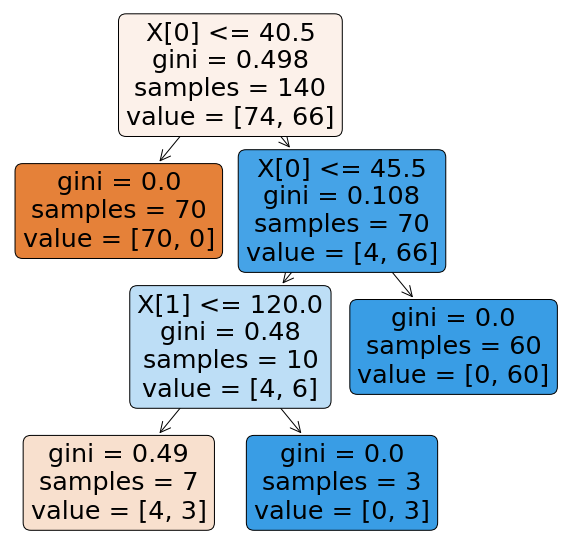

In [21]:
# Plot the tree for gini
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf_gini, 
    filled=True,
    rounded=True
);

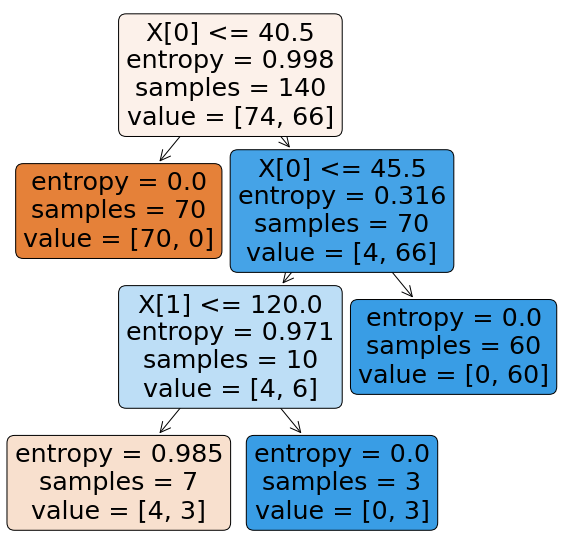

In [22]:
# Plot the tree for entropy
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf_entropy, 
    filled=True,
    rounded=True
);